To-do
1. Apply at least on undersampling, or oversampling

Note: Do not touch the test set during these techniques

From the .txt resource list\
Resampling Methods
1. OVersampling
2. Undersampling


1. Boot Strapping w/ w/o replacement
2. SMOTE: Synthetic Data

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


<img src = '../../sb_tight.png'>
<h1 align = 'center'> Capstone Project 2: Pump It Up </h1>

---

### Notebook 4: Modeling
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### About the project:
The **objective** of this project is to **predict the failure of water points** spread accross Tanzania before they occur.

50% of Tanzania's population do not have access to safe water. Among other sources, Tanzanians depend on water points mostly pumps (~60K) spread across Tanzania. Compared to other infrastructure projects, water point projects consist of a huge number of inspection points that are geographically spread out. Gathering data on the condition of these pumps has been a challenge. From working with local agencies, to implementing mobile based crowd sourcing projects, none have produced satisfactory results.

The lack of quality data creates a number of problem for a stakeholder like the Tanzanian Government, specifically the Ministry of Water. Consequences include not only higher maintainence costs, but also all the problems and nuanced issues faced by communities when their access to water is compromised or threatened.

While better data collection infrastructure should be built overtime, this project (with its model(s), various analysis, and insights) will be key for efficient resource allocation to maximize the number of people and communities with access to water.
In the long run, it will assist stake holders in and project planning, and even local, regional and national level policy formation. 

<h3> About the notebook: </h3>

In [54]:
import pandas as pd
import numpy as np
import collections

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [55]:
df = pd.read_csv('../data/interim/df_imputed.csv')

### Logistic Regression

In [56]:
feature_cols = ['eng_age','installer_bool', 'imputed_gps_height']
dummy_feature_cols = ['quantity', 'extraction_type', 'payment_type',
              'water_quality', 'source', 'waterpoint_type']

feature_cols.extend(dummy_feature_cols)

In [57]:
data = df[feature_cols].copy()

Dummy columns

In [58]:
data = pd.get_dummies(data, columns = dummy_feature_cols, drop_first = True)

### Splitting the dataset

In [59]:
X = data.values # predictor
X.shape # sanity check

(59400, 52)

encoding the target variable as 0 and 1<br>
Also bringing it down to binary classification from ternary (3)  classification

In [60]:
replace_dict = {'functional':0,'non functional':1, 'functional needs repair':1}
y= np.array([replace_dict[i] for i in df['target_var'].values]) # target

In [61]:
y.shape # sanity check

(59400,)

In [62]:
# splitting the data into testing and training sets
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state=25, stratify = y)

<h3> Stratification </h3>
Looking the proportion of target variables

1. Original Whole Dataset

In [63]:
s = df['target_var'].replace(replace_dict).value_counts()/ len (df)
s[0]/s[1]

1.188570796949265

2. Training Dataset

In [64]:
s = collections.Counter(ylr)
s[0]/s[1]

1.18854391825506

3. Testing Dataset

In [65]:
s = collections.Counter(ytestlr)
s[0]/s[1]

1.1886514369933676

---

In [66]:
logreg = LogisticRegression(max_iter = 2500)

# Fit the model on the training data.
logreg.fit(Xlr, ylr) 

LogisticRegression(max_iter=2500)

In [67]:
y_predict_test = logreg.predict(Xtestlr)

print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))

print("\n")
print("[Test] Accuracy score: (ytestlr, y_predict_test)",accuracy_score(ytestlr, y_predict_test))

# AJS: also printout the training score
y_predict_training = logreg.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))

[Test] Accuracy score (y_predict_test, ytestlr): 0.7938720538720538


[Test] Accuracy score: (ytestlr, y_predict_test) 0.7938720538720538


[Training] Accuracy score: (ylr, y_predict_training) 0.7916498316498316


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82     24194
           1       0.82      0.70      0.75     20356

    accuracy                           0.79     44550
   macro avg       0.80      0.78      0.79     44550
weighted avg       0.79      0.79      0.79     44550

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      8065
           1       0.82      0.70      0.76      6785

    accuracy                           0.79     14850
   macro avg       0.80      0.79      0.79     14850
weighted avg       0.80      0.79      0.79     14850



In [69]:
tn, fp, fn, tp = confusion_matrix(ytestlr, y_predict_test).ravel()

In [70]:
confusion_matrix(ytestlr, y_predict_test)

array([[7055, 1010],
       [2051, 4734]], dtype=int64)

''

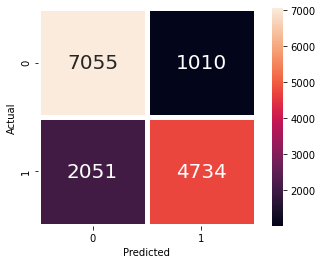

In [71]:
sns.heatmap(confusion_matrix(ytestlr, y_predict_test), 
            annot = True, 
            square = True,
            linewidths = 5,
            annot_kws = {'size' : 20},
            fmt = 'd')
plt.ylabel('Actual')
plt.xlabel('Predicted')
;

<h2> Random Forest Regressor </h2>

In [72]:
rf = RandomForestRegressor()

# Fit the model on the training data.
rf.fit(Xlr, ylr) 

RandomForestRegressor()

In [74]:
y_predict_test = rf.predict(Xtestlr)


y_predict_training = rf.predict(Xlr)


In [75]:
from sklearn.metrics import classification_report, confusion_matrix

print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [37]:
tn, fp, fn, tp = confusion_matrix(ytestlr, y_predict_test).ravel()

In [38]:
confusion_matrix(ytestlr, y_predict_test)

array([[7055, 1010],
       [2051, 4734]], dtype=int64)

''

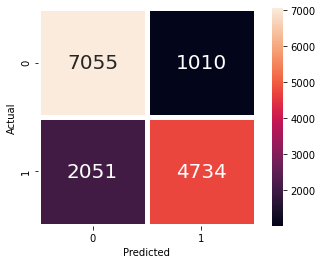

In [39]:
sns.heatmap(confusion_matrix(ytestlr, y_predict_test), 
            annot = True, 
            square = True,
            linewidths = 5,
            annot_kws = {'size' : 20},
            fmt = 'd')
plt.ylabel('Actual')
plt.xlabel('Predicted')
;